In [2]:
import sys

sys.path.append("..")

from vq_gan_3d.model import VQGAN
from omegaconf import OmegaConf
from dataset import CombinedBrainDataset, CombinedBrainDataset17mm
import torch

import matplotlib.pyplot as plt

loaded pretrained LPIPS loss from /sfs/qumulo/qhome/sz9jt/projects/medicaldiffusion/vq_gan_3d/model/cache/vgg.pth
All data: 3546
Dataset size: 211


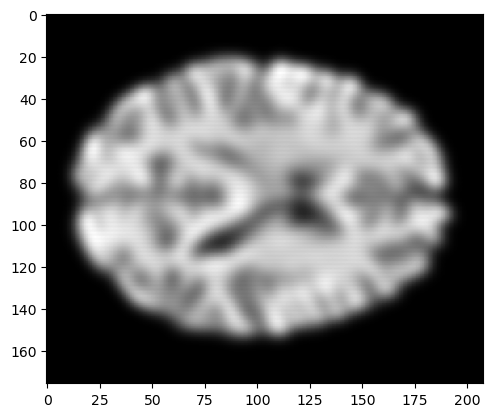

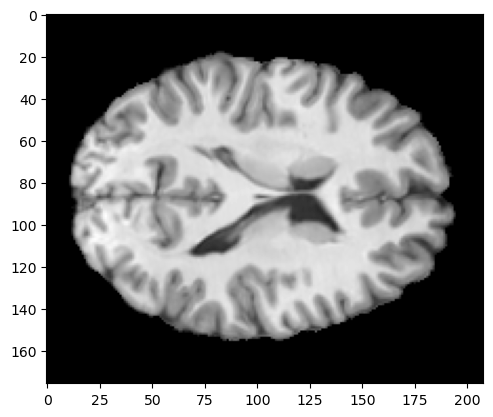

In [6]:
configure_path = "/home/sz9jt/data/t1w_processed/checkpoints/medicaldiffusion/vqgan/COMBINED_BRAIN/lightning_logs/version_60369664/hparams.yaml"
ckpt_path = "/home/sz9jt/data/t1w_processed/checkpoints/medicaldiffusion/vqgan/COMBINED_BRAIN/lightning_logs/version_60369664/checkpoints/epoch=162-step=135000-train/recon_loss=149.84.ckpt"

cfg = OmegaConf.load(configure_path)
cfg = cfg.cfg

data = torch.load(ckpt_path)
model = VQGAN(cfg)
model.load_state_dict(data["state_dict"])

test_dataset = CombinedBrainDataset(root_dir=cfg.dataset.root_dir, type="test")
test_input = test_dataset[0]["data"].unsqueeze(0)

device = torch.device("cuda:0")
model.to(device)
test_input = test_input.to(device)
model.eval()
with torch.no_grad():
    z = model.encode(test_input)
    test_output = model.decode(z)
test_output = test_output.detach().cpu().numpy().squeeze()
plt.imshow(test_output[:, :, 100], cmap="gray")
plt.show()

plt.imshow(test_dataset[0]["data"].squeeze()[:, :, 100], cmap="gray")

loaded pretrained LPIPS loss from /sfs/qumulo/qhome/sz9jt/projects/medicaldiffusion/vq_gan_3d/model/cache/vgg.pth
All data: 3546
Dataset size: 211


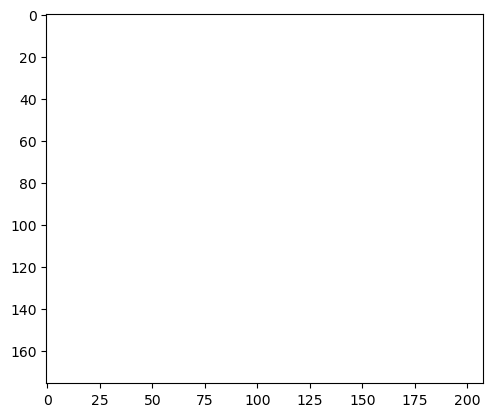

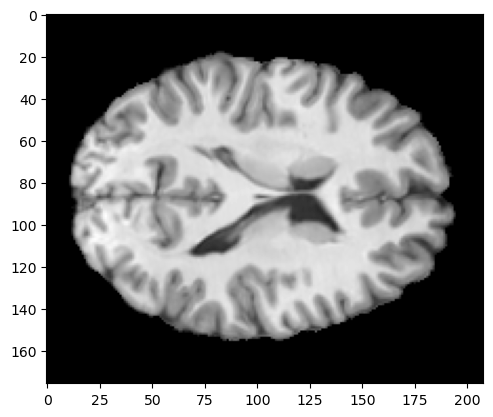

In [3]:
configure_path = "/home/sz9jt/data/t1w_processed/checkpoints/medicaldiffusion/vqgan/COMBINED_BRAIN_17MM/lightning_logs/version_60431920/hparams.yaml"
ckpt_path = "/home/sz9jt/data/t1w_processed/checkpoints/medicaldiffusion/vqgan/COMBINED_BRAIN_17MM/lightning_logs/version_60431920/checkpoints/epoch=197-step=33000-train/recon_loss=nan.ckpt"

cfg = OmegaConf.load(configure_path)
cfg = cfg.cfg

data = torch.load(ckpt_path)
model = VQGAN(cfg)
model.load_state_dict(data["state_dict"])

test_dataset = CombinedBrainDataset(root_dir=cfg.dataset.root_dir, type="test")
test_input = test_dataset[0]["data"].unsqueeze(0)

device = torch.device("cuda:0")
model.to(device)
test_input = test_input.to(device)
model.eval()
with torch.no_grad():
    z = model.encode(test_input)
    test_output = model.decode(z)
test_output = test_output.detach().cpu().numpy().squeeze()
plt.imshow(test_output[:, :, 100], cmap="gray")
plt.show()

plt.imshow(test_dataset[0]["data"].squeeze()[:, :, 100], cmap="gray")

In [11]:
for i in range(10):
    tmp = test_dataset[i]["data"]
    print(tmp.min(), tmp.max())

tensor(0.) tensor(267.1837)
tensor(0.) tensor(250.0573)
tensor(0.) tensor(117.9689)
tensor(0.) tensor(195.8499)
tensor(0.) tensor(128.3839)
tensor(0.) tensor(141.7459)
tensor(0.) tensor(127.2657)
tensor(0.) tensor(268.4759)
tensor(0.) tensor(294.4967)
tensor(0.) tensor(240.6801)
